![aula01capa](./figuras/aula01capa.png)

# Definição de Ciência de Dados
![ciencia_dados](./figuras/ciencia_de_dados.jpeg)

# Aplicação de Ciência de Dados
![ciencia_dados](./figuras/aplicações_ciencia_de_dados.jpeg)

* **Detecção de fraudes:** Modelos de machine learning podem identificar transações fraudulentas em tempo real, analisando padrões de comportamento em milhões de transações.
* **Análise de risco e crédito:** Bancos e instituições financeiras usam a ciência de dados para avaliar o risco de crédito de clientes, ajudando na concessão de empréstimos e financiamentos.
* **Trading algorítmico:** Traders utilizam algoritmos de machine learning para analisar o mercado de ações e fazer decisões de compra e venda de forma automática.
* **Recomendação de conteúdo:** Plataformas como Netflix e Spotify usam algoritmos de recomendação para sugerir séries, filmes e músicas com base no comportamento dos usuários.

# Componentes da Ciência de Dados
![componentesCienciaDados](./figuras/componentesCienciaDados.png)

# Considere um Problema
### Imagine que você precisa separar tipos de espécies de uma flor.

Seu objetivo é : Prever a espécie de uma flor com base nas medidas das sépalas e pétalas.



![flor](./figuras/flor.png)

# ETAPAS DO PROJETO

## PASSO 1: Coleta de Dados

![coletadados](./figuras/coletadados.png)

### O Iris dataset está disponível diretamente na biblioteca sklearn, por isso podemos carregá-lo sem precisar baixar ou carregar arquivos.

### Explicação:
**iris.data:** Contém as características da flor (comprimento e largura das sépalas e pétalas).

**iris.target:** Contém os rótulos de classificação (0, 1, 2), que correspondem às três espécies de íris.

In [104]:
# Importando as bibliotecas necessárias
from sklearn.datasets import load_iris # type: ignore
import pandas as pd # type: ignore

# Carregar o dataset Iris
iris = load_iris()

# Criar um DataFrame com as características (features)
dados = pd.DataFrame(iris.data, columns=iris.feature_names)

# Adicionar a coluna alvo (target), que contém as classes das flores
dados['species'] = iris.target

# Exibir as primeiras linhas do DataFrame
dados.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## PASSO 2: Preparação e Limpeza dos Dados

![preparacaodados](./figuras/preparacaodados.png)

### Como o dataset Iris é bem limpo, não há dados ausentes. Aqui, verificamos se existe algum problema nos dados.

#### Explicação:
**dados.isnull().sum():** Verifica se há valores ausentes nas colunas. No caso do Iris dataset, ele não tem valores ausentes.

**dados['species'].value_counts():** Mostra quantas observações existem para cada espécie de flor.

In [15]:
# Verificar se há dados ausentes
print(dados.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [18]:
# Verificar a distribuição das classes (espécies de flores)
print(dados['species'].value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


## PASSO 3: Análise Exploratória dos Dados

![Análise Exploratória](./figuras/AnáliseExploratoria.png)

### Vamos fazer algumas análises básicas e explicar o que cada gráfico ou tabela significa. A ideia é que  possamos entender como as diferentes características das flores estão relacionadas entre si e como isso influencia a classificação.


### 3.1 Distribuição das Espécies de Flores
Primeiro, vamos verificar quantas amostras temos de cada espécie de flor no dataset.

#### Explicação:

Esse gráfico mostra quantas amostras temos de cada uma das três espécies de íris no dataset. O eixo X representa as espécies (0 = Setosa, 1 = Versicolor, 2 = Virginica) e o eixo Y mostra a quantidade de amostras de cada espécie.
O gráfico é útil para ver se as classes estão equilibradas ou se alguma tem muito mais amostras que as outras.

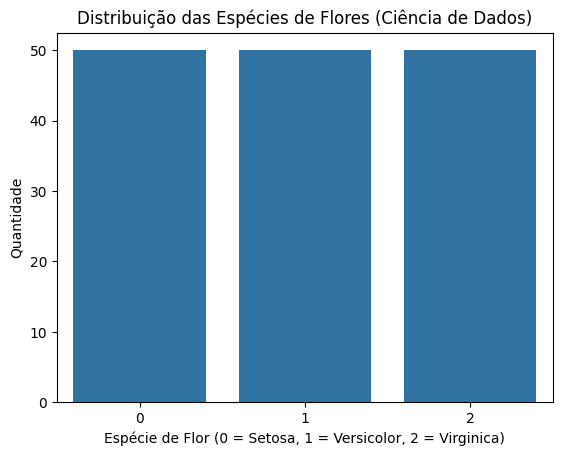

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem de flores por espécie
sns.countplot(x='species', data=dados)
plt.title("Distribuição das Espécies de Flores (Ciência de Dados)")
plt.xlabel("Espécie de Flor (0 = Setosa, 1 = Versicolor, 2 = Virginica)")
plt.ylabel("Quantidade")
plt.show()


### 3.2 Distribuição do Comprimento da Pétala por Espécie

Agora vamos ver como o comprimento das pétalas varia entre as três espécies de flores. Isso nos ajuda a entender se essa característica pode ajudar a diferenciar as espécies.

#### Explicação:
Um boxplot nos ajuda a visualizar a distribuição de uma característica (neste caso, o comprimento da pétala) para cada espécie de flor.

O gráfico mostra que a espécie Setosa (0) tem pétalas significativamente mais curtas que as outras duas espécies, enquanto as espécies Versicolor (1) e Virginica (2) têm pétalas mais longas e apresentam alguma sobreposição.

Esse tipo de gráfico ajuda a identificar se uma característica (como o comprimento da pétala) pode ser usada para diferenciar entre as espécies.

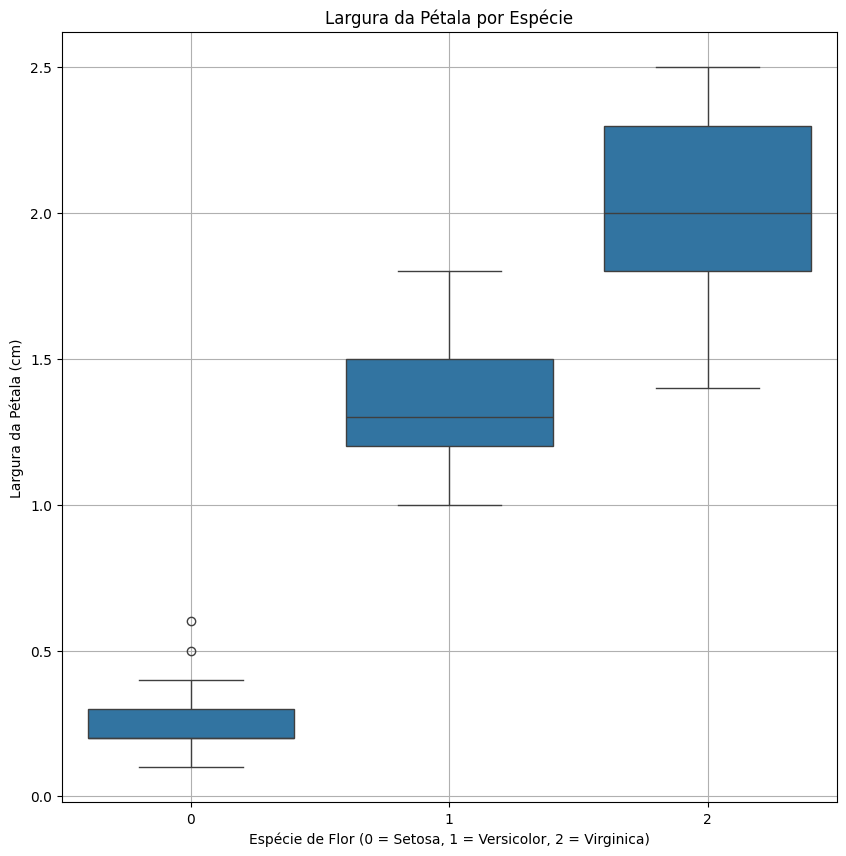

In [100]:
# Boxplot para comparar o comprimento da pétala entre as espécies
plt.figure(figsize=(10,10))
sns.boxplot(x='species', y='petal width (cm)', data=dados)
plt.title("Largura da Pétala por Espécie")
plt.xlabel("Espécie de Flor (0 = Setosa, 1 = Versicolor, 2 = Virginica)")
plt.ylabel("Largura da Pétala (cm)")
plt.grid(True)
plt.show()

### 3.3 Comparando o Comprimento da Sépala e da Pétala

Agora, vamos visualizar como o comprimento da sépala e da pétala se relacionam entre as diferentes espécies de flores. Isso pode nos dar uma ideia de como essas características podem ajudar a classificar as flores.

#### Explicação:

Um scatterplot é útil para ver a relação entre duas variáveis numéricas.

Aqui, ele mostra como o comprimento da sépala e o comprimento da pétala estão relacionados.
As cores diferentes no gráfico representam as três espécies de flores. Podemos ver que a espécie Setosa (cor "mais clara") tem pétalas e sépalas mais curtas, enquanto Versicolor e Virgínica estão mais agrupadas, mas têm diferenças sutis.
Isso indica que essas duas características (sépalas e pétalas) podem ser úteis para distinguir as espécies.

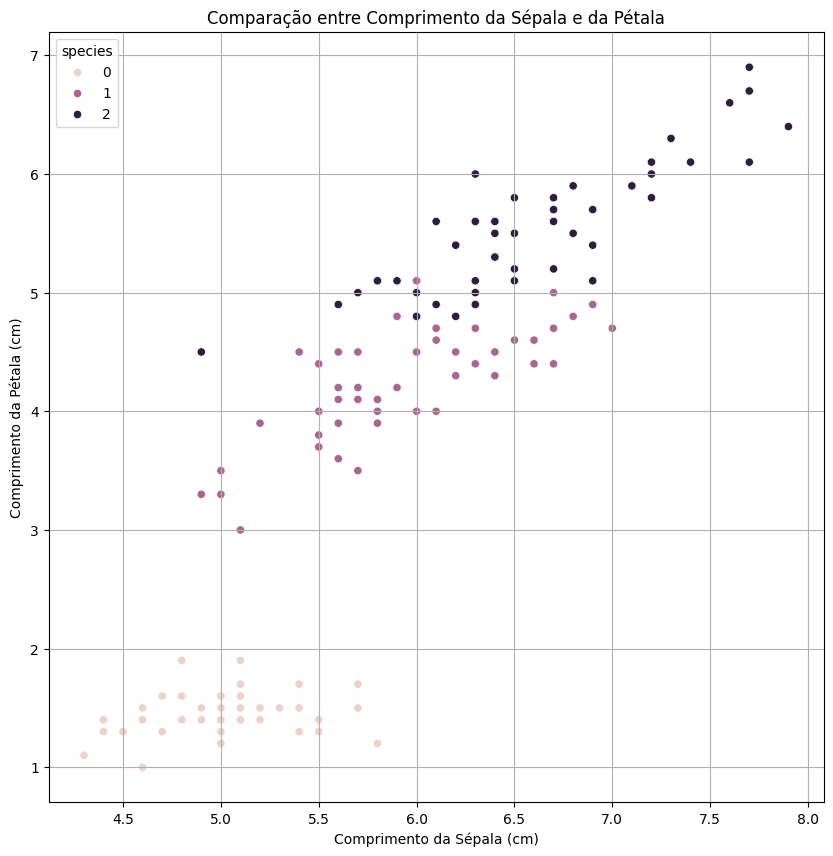

In [101]:
# Scatterplot para comparar comprimento da sépala e da pétala
#0 = Setosa, 1 = Versicolor, 2 = Virginica)
plt.figure(figsize=(10,10))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=dados)
plt.title("Comparação entre Comprimento da Sépala e da Pétala")
plt.xlabel("Comprimento da Sépala (cm)")
plt.ylabel("Comprimento da Pétala (cm)")
plt.grid(True)
plt.show()

### 3.4 Resumo Estatístico das Variáveis Numéricas
Para entender mais sobre a distribuição das características numéricas (como comprimento e largura das sépalas e pétalas), podemos gerar um resumo estatístico.

#### Explicação:
O comando describe() gera um resumo estatístico com informações importantes como a média, o valor mínimo e o valor máximo de cada característica.

Isso nos ajuda a entender a variação dos dados e identificar se há discrepâncias ou padrões importantes. Por exemplo, podemos ver que o comprimento da pétala varia muito mais que a largura da sépala.

In [7]:
# Exibir resumo estatístico das variáveis numéricas
print(dados.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)   
count         150.000000        150.000000         150.000000  \
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


### Conclusão da Análise
Com essa análise simplificada, conseguimos entender algumas coisas importantes sobre o dataset:

- Distribuição das espécies: O dataset está equilibrado, com quantidades semelhantes de amostras para cada espécie de flor.

- Diferença de características entre as espécies: A espécie Setosa é bem diferente das outras duas, especialmente no comprimento da pétala. Já Versicolor e Virginica têm algumas características que se sobrepõem, mas com pequenas diferenças.

- Correlação entre sépalas e pétalas: As flores com sépalas mais longas tendem a ter pétalas mais longas, mas essa relação varia entre as espécies.

Essa análise nos dá uma boa base para avançar para a modelagem, onde usaremos essas características para prever a espécie de uma flor.

## PASSO 4: Modelagem dos Dados

![modelagemdados](./figuras/modelagemdados.png)

### Agora vamos criar um modelo simples de Random Forest para classificar as espécies de flores com base nas medidas de suas sépalas e pétalas.
  
#### Explicação:
**train_test_split:** Divide os dados em treino (80%) e teste (20%) para que possamos avaliar o desempenho do modelo em dados que ele não viu antes.

**RandomForestClassifier:** Um modelo de classificação que usa múltiplas árvores de decisão para melhorar a precisão.

**accuracy_score:** Mede a porcentagem de previsões corretas feitas pelo modelo.  

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separar as variáveis independentes (X) e a variável dependente (y)
X = dados.drop('species', axis=1)
y = dados['species']

# Dividir os dados em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Random Forest
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo com base na acurácia
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))


Acurácia do modelo: 1.0


## PASSO 5: Validação e Tomada de Decisão

![validacao](./figuras/validacao.png)

### Vamos gerar um relatório de classificação para avaliar o desempenho do modelo de forma mais detalhada.
  
#### Explicação:
O **classification_report** mostra métricas como precisão, recall e F1-score para cada classe de flor, ajudando a entender melhor como o modelo está se comportando em cada categoria. Não para melhorar a precisão.

**accuracy_score:** Mede a porcentagem de previsões corretas feitas pelo modelo.  

In [9]:
from sklearn.metrics import classification_report

# Relatório detalhado do desempenho do modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## PASSO 6: Implantação e Monitoramento

![implantacao](./figuras/implantacao.png)

### Por fim, mostramos como o modelo poderia ser utilizado para prever a espécie de uma nova flor.
  
#### Explicação:
Simulamos a previsão de uma nova flor com base em suas características. O modelo prevê a espécie da flor usando os dados de sépalas e pétalas.

In [120]:
nova_flor = {'sepal length (cm)': 5.1,
             'sepal width (cm)': 3.5,
              'petal length (cm)': 5,
              'petal width (cm)': 4
             }

nova_flor = pd.DataFrame.from_dict(nova_flor, orient='index').T
nova_flor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,5.0,4.0


In [121]:
# Exemplo de uso do modelo em uma nova flor com características fictícias
# nova_flor = [[5.1, 3.5, 1.4, 0.2]]  # Comprimento e largura das sépalas e pétalas
previsao = modelo.predict(nova_flor)
print("Previsão da nova flor (0=setosa, 1=versicolor, 2=virginica):", previsao[0])

Previsão da nova flor (0=setosa, 1=versicolor, 2=virginica): 2


### Resumo das Etapas:

1) Coleta de Dados: Carregamos o dataset Iris e preparamos as colunas com as características e classes das flores.

2) Preparação e Limpeza: Verificamos que os dados não têm valores ausentes e estão prontos para análise.

3) Análise Exploratória: Visualizamos as relações entre as características e as espécies de flores usando gráficos.

4) Modelagem: Criamos e treinamos um modelo de Random Forest para classificar as flores.

5) Validação: Avaliamos o modelo com a acurácia e o relatório de classificação.

6) Implantação: Mostramos como usar o modelo para prever a espécie de novas flores.
